import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


Load the Dataset and Select Specific Columns


In [ ]:
# Load dataset with specific columns

df = pd.read_csv('https://raw.githubusercontent.com/ripatanny101/Predicting-Employee-Attrition/main/WA_Fn-UseC_-HR-Employee-Attrition.csv', usecols=[
    'Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
    'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'Attrition'])

print(df.head())


   Age Attrition  EnvironmentSatisfaction  JobInvolvement  JobLevel  \
0   41       Yes                        2               3         2   
1   49        No                        3               2         2   
2   37       Yes                        4               2         1   
3   33        No                        4               3         1   
4   27        No                        1               3         1   

   JobSatisfaction MaritalStatus  MonthlyIncome OverTime  StockOptionLevel  \
0                4        Single           5993      Yes                 0   
1                2       Married           5130       No                 1   
2                3        Single           2090      Yes                 0   
3                3       Married           2909      Yes                 0   
4                2       Married           3468       No                 1   

   TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  YearsWithCurrManager  
0                  8   

Generate Data Visualizations

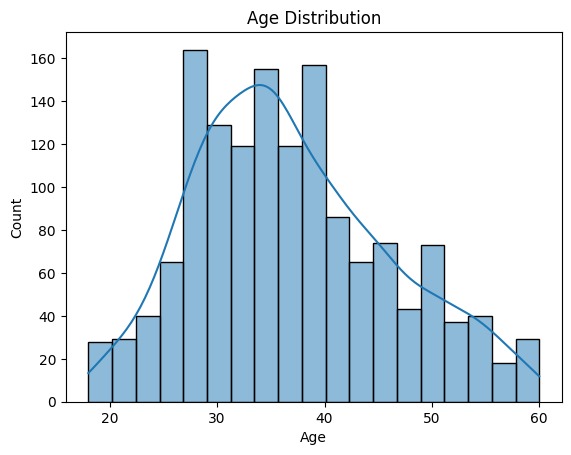

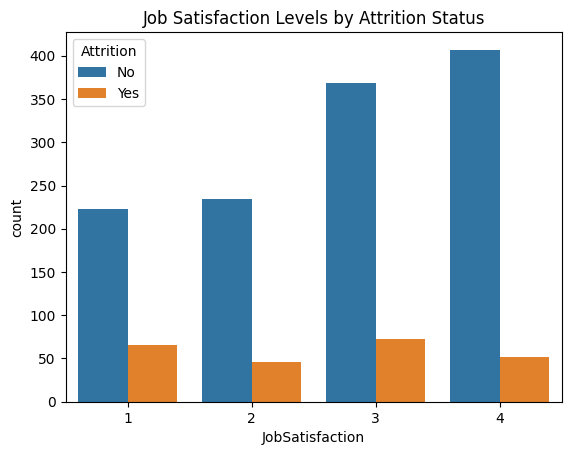

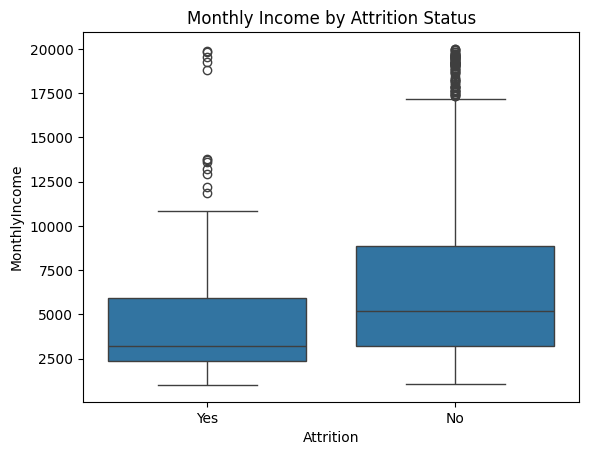

In [ ]:

# Distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Job Satisfaction by Attrition
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Job Satisfaction Levels by Attrition Status')
plt.show()

# Monthly Income Distribution by Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Attrition Status')
plt.show()


Data Preprocessing
* Handle categorical variables and split the data

In [ ]:
# Encode categorical variables
encoder = LabelEncoder()
df['MaritalStatus'] = encoder.fit_transform(df['MaritalStatus'])
df['OverTime'] = encoder.fit_transform(df['OverTime'])
df['Attrition'] = encoder.fit_transform(df['Attrition'])

# Splitting the data
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Define and Train Models

In [ ]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

        # Print classification report
        print(f"\nClassification Report for {name}:")
        print(classification_report(y_test, y_pred))

    return results

# Evaluate models
model_results = train_and_evaluate(models, X_train_scaled, X_test_scaled, y_train, y_test)



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       380
           1       0.50      0.18      0.27        61

    accuracy                           0.86       441
   macro avg       0.69      0.58      0.59       441
weighted avg       0.83      0.86      0.83       441


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.75      0.10      0.17        61

    accuracy                           0.87       441
   macro avg       0.81      0.55      0.55       441
weighted avg       0.86      0.87      0.83       441


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       380
           1       0.50      0.18      0.27        61

    accuracy                           0.86       441
   macro avg       0.6

Plot Results

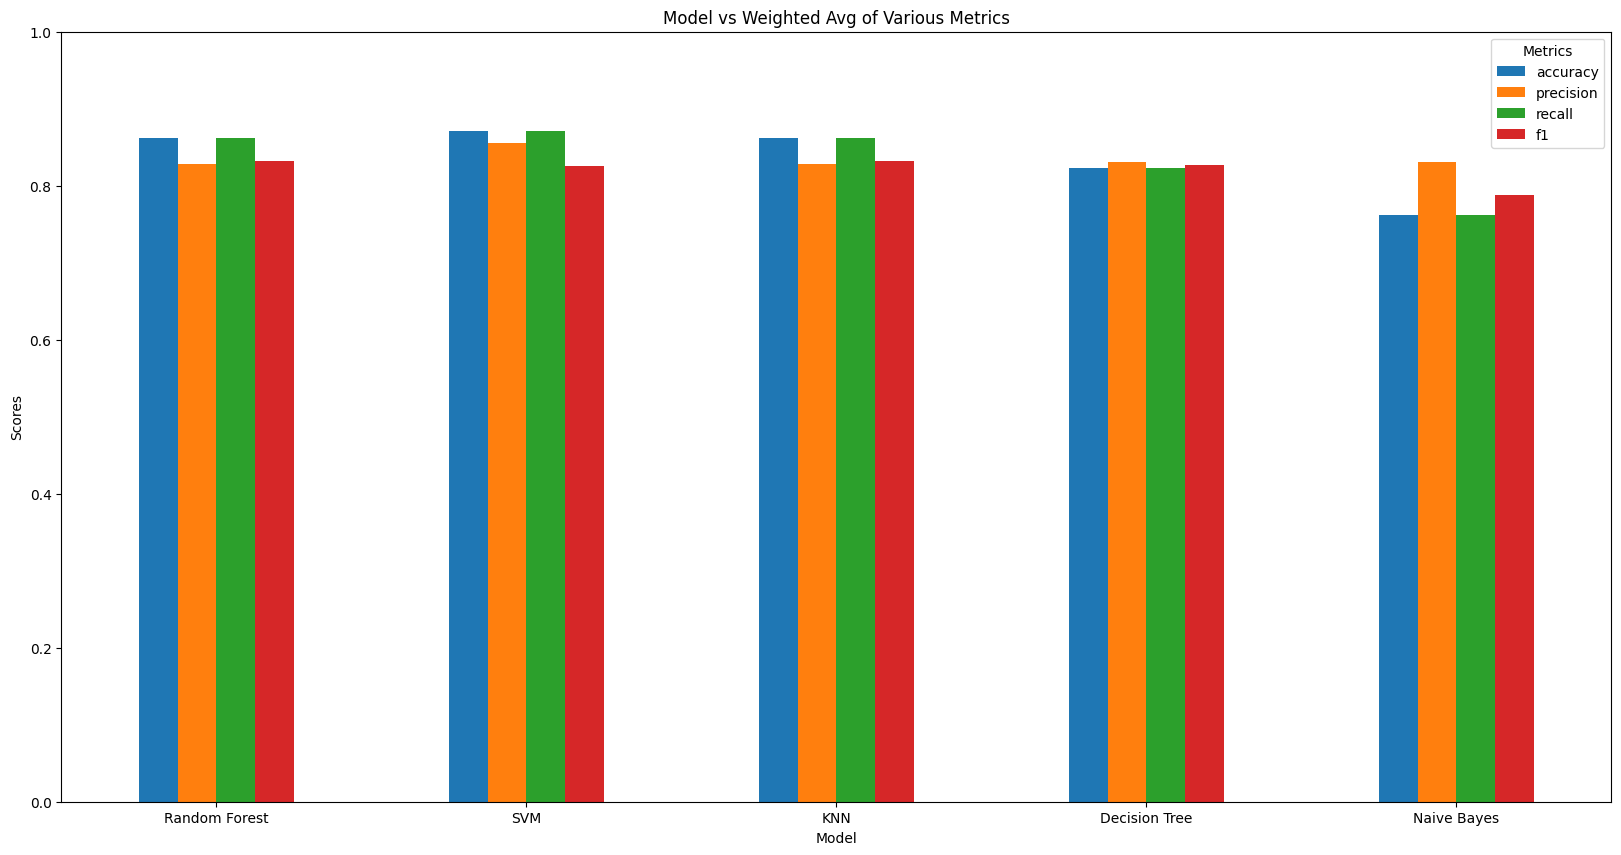

In [ ]:
# Prepare data for plotting
metrics_df = pd.DataFrame(model_results).T  # Transpose to have models as rows

# Plotting
fig, ax = plt.subplots(figsize=(20, 10))
metrics_df[['accuracy', 'precision', 'recall', 'f1']].plot(kind='bar', ax=ax)
ax.set_title('Model vs Weighted Avg of Various Metrics')
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_ylim([0, 1])  # Set y-axis limits to match example image scale
ax.legend(title='Metrics')
plt.xticks(rotation=0)
plt.show()
